## Final Project Submission

Please fill out:
* Student name: Esra Guzel
* Student pace: Full time
* Scheduled project review date/time: Wed Feb 19, 2020 10:00 - 10:45 am (Eastern Time)
* Instructor name: Abhineet Kulkarni
* Blog post URL:


## Introduction


In this project, the datasets from IMDb used to explore the movie industry which are available for personal and non-commercial use.

The data is explored to answer three questions:
How many movies released every year and every month? Which month of the year is more profitable?
Is there any relation between ROI and genre? Which genre returns more ROI? What are the top genres in return?
Is there any type of relation/correlation between production budget, domestic gross, worldwide gross, popularity and vote average? 

The questions aim to explore overall condition of the movie industry which may provide beneficial insights and help the decision making process for the new companies/investors in the industry.

### Importing the Data
It is better to use glob to import along list of csv files all in once. For path name manipulation os dictionary is also imported. A for loop is used to iterate over the csv_files list in order to read the files in pandas. First, the data type of csv_files is checked whether it is a list. An empty dictionary to is created store the names and the dataframes. 

To rename dictionary keys os.pathname.basename() function is used to get the tail of the path. 

In [1]:
# Imported glob to load csv files all in once and os for path name manipulation
import pandas as pd
import os
from glob import glob

In [2]:
# Created a list called csv_files using glob to store file names. 
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [3]:
# Checked the type of csv_files.
type(csv_files)

list

In [4]:
# Defined an empty dictionary d to store csv_files and used for loop to read csv_files.
d={}
for file in csv_files:
    d[file] = pd.read_csv(file)

In [5]:
# The file names became keys of the dictionary d. 
# Checked the keys of the dictionary d.
d.keys()

dict_keys(['./zippedData/imdb.title.crew.csv.gz', './zippedData/tmdb.movies.csv.gz', './zippedData/imdb.title.akas.csv.gz', './zippedData/imdb.title.ratings.csv.gz', './zippedData/imdb.name.basics.csv.gz', './zippedData/imdb.title.basics.csv.gz', './zippedData/tn.movie_budgets.csv.gz', './zippedData/bom.movie_gross.csv.gz', './zippedData/imdb.title.principals.csv.gz'])

In [6]:
# Checked one of the values with info() function. 
d['./zippedData/imdb.title.crew.csv.gz'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [7]:
# Wrote a function to rename the keys of the dictionary. 
# Used zip() function to combine new_keys and values from d.
def rename_keys(d):
    new_keys = [os.path.basename(k).replace(".csv", "").replace(".", "_") for k in d.keys()]
    d_new = {k:v for k, v in zip(new_keys, d.values())}
    return d_new
  
e = rename_keys(d)
e.keys()

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

## Question 1: How many movies released every year, every month? Which month of the year is more profitable?

This question is asked to explore which time of the year is preferred for movie releases a movie and which months are more profitable in return, as well as to see the overall distribution of movies by years. 

'tmdb_movies_gz' is chosen to search for movie distribution by months and years, the first part of the question, since it contains highest number of movies and release dates compared to other dataframes available. 

Before answering, the data is cleaned and duplicated values are removed.

In [8]:
# Defined the dataframe that I wanted to work on as df and dropped the unnecessray column. 
df = e['tmdb_movies_gz']
df = df.drop(df.columns[0], axis=1)

### Cleaning the data for the first part of the question

In [9]:
# Checked the head and tail for any unsual data.
df.head(60)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [10]:
df.tail(60)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26457,[99],448912,fr,Maison du bonheur,0.6,2018-08-24,Maison du bonheur,5.0,1
26458,[99],406486,en,Boy Howdy! The Story of CREEM Magazine,0.6,2018-10-01,Boy Howdy! The Story of CREEM Magazine,5.0,1
26459,[18],397827,en,No Light and No Land Anywhere,0.6,2018-03-16,No Light and No Land Anywhere,5.0,1
26460,"[80, 878, 53]",456897,en,Mind and Machine,0.6,2017-03-26,Mind and Machine,4.8,4
26461,[18],518565,en,My Daddy is in Heaven,0.6,2018-04-16,My Daddy is in Heaven,4.5,2
26462,[10749],478829,en,Once Upon a Winter's Date,0.6,2018-01-01,Once Upon a Winter's Date,4.5,4
26463,[18],386687,en,Josephine Doe,0.6,2018-03-06,Josephine Doe,4.5,2
26464,[53],505039,en,Illicit Desires,0.6,2018-04-08,Illicit Desires,4.3,18
26465,[],591880,en,Choose Go,0.6,2018-02-28,Choose Go,4.0,1
26466,[],585649,en,The Blackwell Ghost 2,0.6,2018-08-04,The Blackwell Ghost 2,4.0,1


In [11]:
# Checked for null values
df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [12]:
# Exploring the frequency of values
df['id'].value_counts(normalize=True)

292086    0.000113
463839    0.000113
11976     0.000113
391872    0.000113
416572    0.000113
            ...   
356987    0.000038
350846    0.000038
479871    0.000038
500353    0.000038
524288    0.000038
Name: id, Length: 25497, dtype: float64

In [13]:
# Found some duplicated data
duplicates = df[df.duplicated(subset=['id', 'original_language'])]
print(len(duplicates))
duplicates.head(10)

1020


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2477,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553
2536,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387
2673,"[18, 10749]",46705,en,Blue Valentine,8.994,2010-12-29,Blue Valentine,6.9,1677
2717,"[35, 18, 14, 27, 9648]",45649,en,Rubber,8.319,2010-09-01,Rubber,5.9,417
2803,"[35, 18]",46829,en,Barney's Version,7.357,2011-01-14,Barney's Version,7.2,210
2919,[18],54602,en,Skateland,5.938,2011-05-13,Skateland,5.4,16
2946,"[28, 18, 53]",56812,es,Balada triste de trompeta,5.552,2011-08-19,The Last Circus,6.7,177
3030,"[53, 18, 10749, 80]",47261,es,Carancho,4.554,2011-02-11,Carancho,6.6,59
3184,"[10749, 35, 18]",70588,en,The Myth of the American Sleepover,3.066,2011-07-22,The Myth of the American Sleepover,6.2,47


In [14]:
# Dropping the duplicated rows
df = df[~df.duplicated(subset=['id'], keep='first')]

In [15]:
# Checking for any duplicates again
df[df.duplicated(subset='id')]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count


In [16]:
# Checked for columns type and see that 'release_date' is an object.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            25497 non-null object
id                   25497 non-null int64
original_language    25497 non-null object
original_title       25497 non-null object
popularity           25497 non-null float64
release_date         25497 non-null object
title                25497 non-null object
vote_average         25497 non-null float64
vote_count           25497 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


To begin the analysis for the first question, first the type of the 'release_date' is changed to datetime type to extract year and month. The extracted months and years are added as a separate column to the dataframe. 
Furthermore, the groupby() function is used to group data in years, months and id numbers. With the help of count() function sum of id numbers for each year and month is reached. It is chosen to show the last ten years at the bar plot since most of the movies are concentrated at the last ten years.

In [17]:
# Let's see the type of the column again
df['release_date'].dtype

dtype('O')

### Changing the type of columns 

In [18]:
# Converting the columns type to datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')
df['release_date'].dtype

dtype('<M8[ns]')

In [19]:
# To be sure let's look at first 10 rows of release date.
# I can see that now its type is datetime.
df['release_date'][:10]

0   2010-11-19
1   2010-03-26
2   2010-05-07
3   1995-11-22
4   2010-07-16
5   2010-02-11
6   2009-12-18
7   2010-06-17
8   2010-07-09
9   2010-11-04
Name: release_date, dtype: datetime64[ns]

In [20]:
# Controlling if there are any null values emerged due to an error.
df['release_date'].isnull().sum()

0

In [21]:
# Looking for earliest and latest release dates
print(df['release_date'].min())
print(df['release_date'].max())

1930-04-29 00:00:00
2020-12-25 00:00:00


In [22]:
# Created new columns of year and month.
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
    
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year,release_month
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,11
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,7


In [23]:
# It is clear that the number of movies increases after 2009.
df['release_year'].value_counts()[:20]

2015    3066
2013    3066
2014    3052
2016    2970
2017    2921
2011    2645
2012    2615
2018    2496
2010    2393
2019      63
2009      39
2008      13
2004      10
2005       9
2006       9
2007       9
1986       7
1995       7
2000       5
1996       5
Name: release_year, dtype: int64

### Showing the results of first part of the question with bar plot

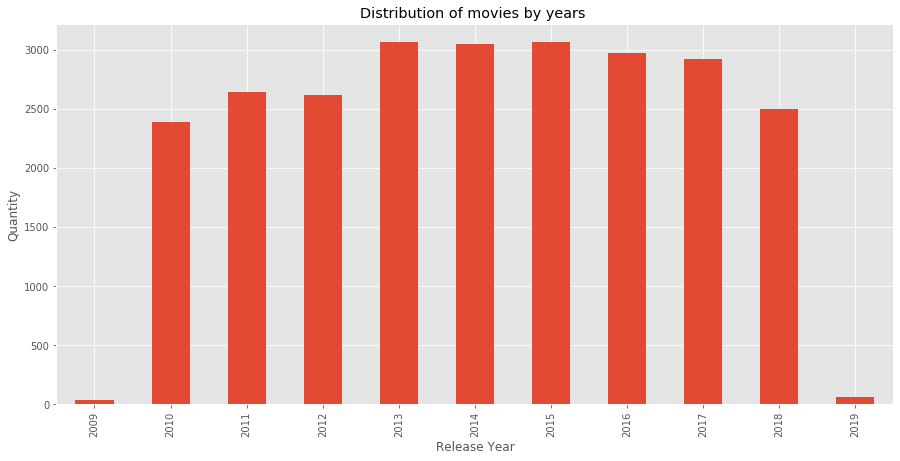

In [24]:
# Distribution of movies by years 
# I wanted to show the movies released after 2009 and onwards since the movies are mostly 
# concentrated after 2009. 

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fig, ax = plt.subplots(figsize=(15,7))
df[
    (df['release_year'] >= 2009)
    &
    (df['release_year'] <= 2019)
].groupby('release_year')['id'].count().plot.bar(ax=ax)
ax.set_xlabel('Release Year')
ax.set_ylabel('Quantity')
ax.set_title('Distribution of movies by years ')
plt.show()

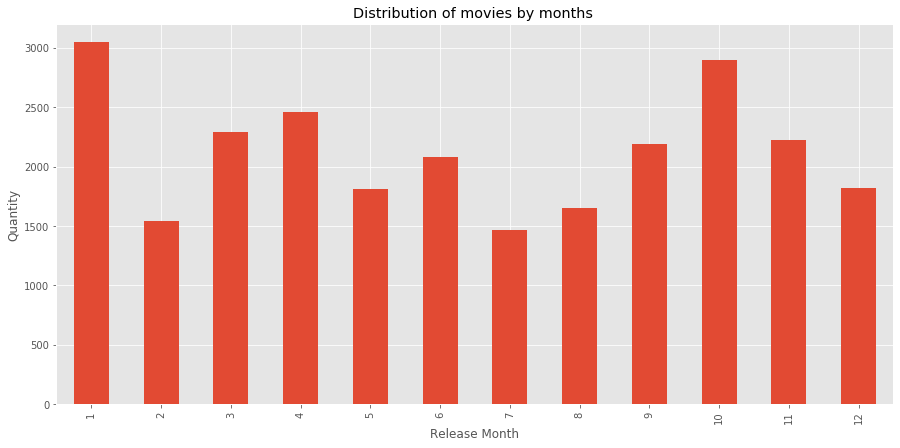

In [25]:
# Distribution of movies by months

fig, ax = plt.subplots(figsize=(15,7))
df.groupby('release_month')['id'].count().plot.bar()
ax.set_xlabel('Release Month')
ax.set_ylabel('Quantity')
ax.set_title('Distribution of movies by months ')
plt.show()

The first visual clearly shows our first evaluation that the dataframe includes the movies mostly released after 2009. Also, it is seen that the years 2013, 2014 and 2015 has the highest number of movies. 

According to the second visual the movies are mostly released on the first month of the year followed by October, April and March. July is the month when least number of movies released.


To find insights about profitability for the second part of the question, production budget, domestic gross, worldwide gross values are needed. 'tn_movie_budgets_gz' dataframe is used here since it already has release dates and production budget, domestic gross, worldwide gross. 

The formula return on investment = (gain from investment — cost of investment) / cost of investment is used to calculate each movie's profitablity. Before calculation, the type of numerical columns changed to integer and '$' sign and the ',' is removed from the numerical data with the help of make_plain_number() function and applied through the numerical columns with apply() function. After calculation of Domestic and Worldwide ROI data for each movie, the new columns are added to our dataframe. 
  

### Cleanin data for the second part of the question

In [26]:
# For the second part of my question I want show which months are more profitable. Thus, I
#  choose a new dataframe which includes production budget, domestic gross and worlwide gross
#  as well as the release dates.
# Stored the dataframe as df_gross.
df_gross = e['tn_movie_budgets_gz']
df_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [27]:
# Noticed the both type of numerical columns and release_date column are object.
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [28]:
# Checking for the duplicated values
duplicates = df_gross[df_gross.duplicated(subset=['movie'])]
print(len(duplicates))

84


In [29]:
# Removing the duplicated values
df_gross = df_gross[~df_gross.duplicated(subset=['movie'], keep='first')].copy(deep=True)

In [30]:
# Looking for any repeting unsual values, one more time
df_gross['movie'].value_counts()[:5]

Baahubali: The Beginning                  1
Revolution#9                              1
Kill List                                 1
Tristram Shandy: A Cock and Bull Story    1
The Fugitive                              1
Name: movie, dtype: int64

In [31]:
# Wrote a for loop that removes the '$' sign, comas and change the datatype of numerical columns 
# to integer.
def make_plain_number(s):
    plain = s.replace('$', '').replace(',', '')
    return plain

numerical_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in numerical_cols:
    df_gross[col] = df_gross[col].apply(make_plain_number)
    df_gross[col] = df_gross[col].astype(int)
   

In [32]:
# Changed the type of release_date column from object to datetime.
df_gross['release_date'] = pd.to_datetime(df_gross['release_date'], format='%b %d, %Y', errors='coerce')
df_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


### Changing type of columns

In [33]:
# Created two separate columns of release_year and release month. 
df_gross['release_year'] = df_gross['release_date'].dt.year
df_gross['release_month'] = df_gross['release_date'].dt.month
    
df_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12


In [34]:
# Created two separate columns of 'roi_ratio_worldwide' and roi_ratio_domestic'.

df_gross['roi_ratio_worldwide'] = (df_gross['worldwide_gross'] - df_gross['production_budget']) / df_gross['production_budget']
df_gross['roi_ratio_domestic'] = (df_gross['domestic_gross'] - df_gross['production_budget']) / df_gross['production_budget']
df_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,roi_ratio_worldwide,roi_ratio_domestic
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12,5.532577,0.789430
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,1.546673,-0.412899
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6,-0.572108,-0.877822
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,3.243841,0.388403
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,3.153696,0.956408


During grouping the ROI ratio by months, the mean () function is used instead of sum () to reach unbiased results. It is clear that June is more profitable independent of the number of movies released that month. 

In terms of Worlwide ROI Ratio and Domestic ROI Ratio, June is the most profitable month followed by June and August. 

### Showing results with bar plot for the second part of the question

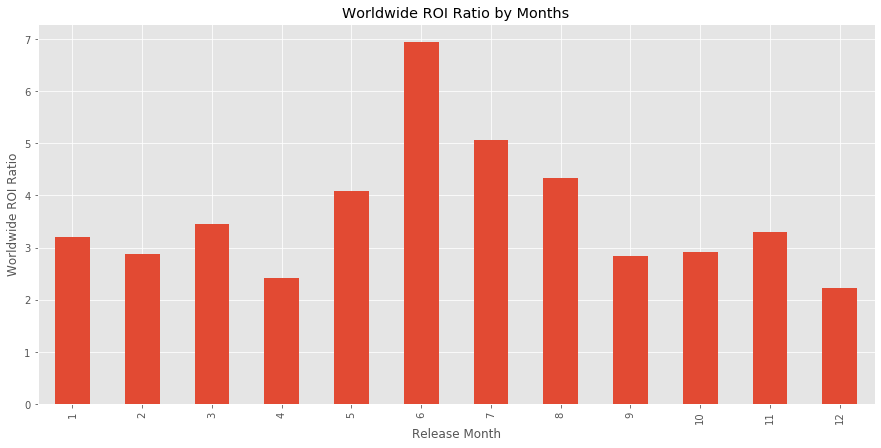

In [35]:
# Worldwide ROI Ratio by Months
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fig, ax = plt.subplots(figsize=(15,7))
df_gross.groupby('release_month')['roi_ratio_worldwide'].mean().plot.bar()
ax.set_ylabel('Worldwide ROI Ratio')
ax.set_xlabel('Release Month')
ax.set_title('Worldwide ROI Ratio by Months')
plt.show()

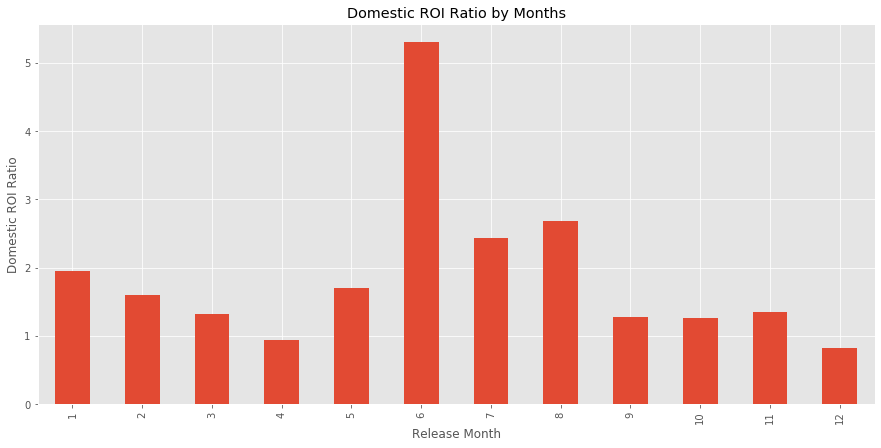

In [36]:
# Domestic ROI Ratio by Months
fig, ax = plt.subplots(figsize=(15,7))
df_gross.groupby('release_month')['roi_ratio_domestic'].mean().plot.bar()
ax.set_ylabel('Domestic ROI Ratio')
ax.set_xlabel('Release Month')
ax.set_title('Domestic ROI Ratio by Months')
plt.show()

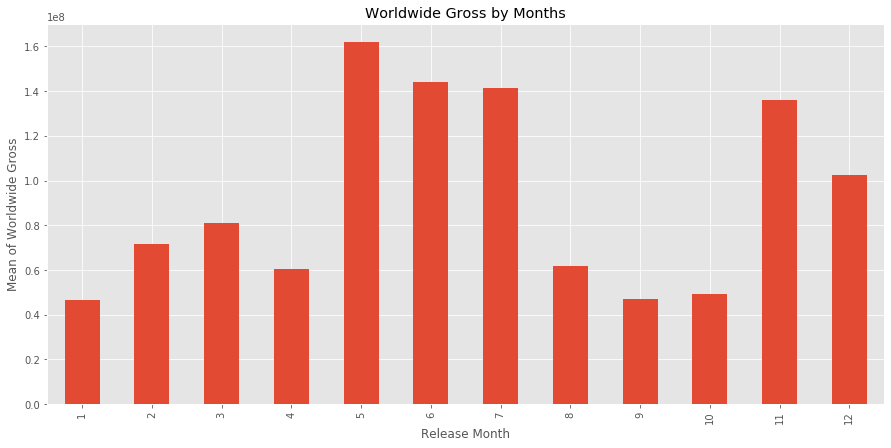

In [37]:
# Worlwide Gross by Months
fig, ax = plt.subplots(figsize=(15,7))
df_gross.groupby('release_month')['worldwide_gross'].mean().plot.bar()
ax.set_ylabel('Mean of Worldwide Gross')
ax.set_xlabel('Release Month')
ax.set_title('Worldwide Gross by Months')
plt.show()

Both Worldwide Gross and Domestic Gross reach its highest value in May followed by June, July and November.  

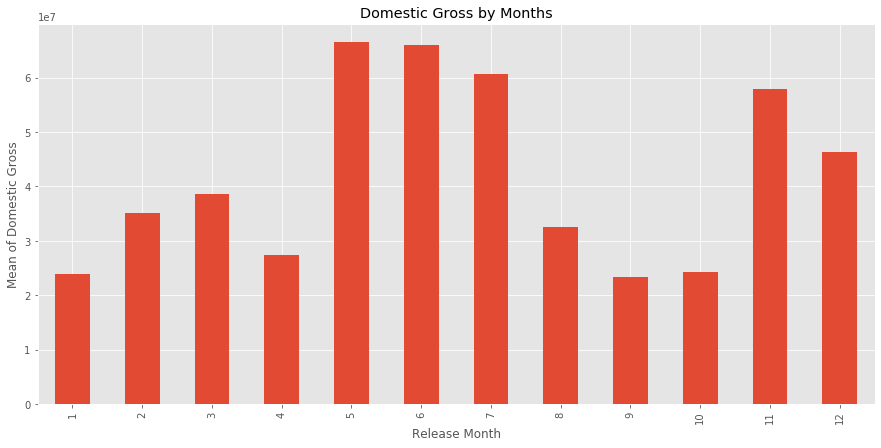

In [38]:
# Domestic Gross by Months
fig, ax = plt.subplots(figsize=(15,7))
df_gross.groupby('release_month')['domestic_gross'].mean().plot.bar()
ax.set_ylabel('Mean of Domestic Gross')
ax.set_xlabel('Release Month')
ax.set_title('Domestic Gross by Months')
plt.show()

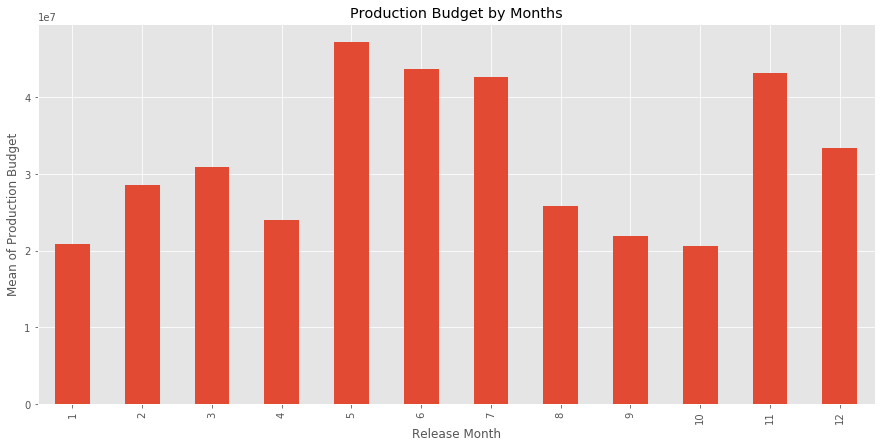

In [39]:
# Production Budget by Months
fig, ax = plt.subplots(figsize=(15,7))
df_gross.groupby('release_month')['production_budget'].mean().plot.bar()
ax.set_ylabel('Mean of Production Budget')
ax.set_xlabel('Release Month')
ax.set_title('Production Budget by Months')
plt.show()

Production budget distribution by months shows that May, June, July and November are the months with overall average largest budget movies.

In summary, according to the given dataset, it is clear that top 3 months that movies released are January, October and April, on the other hand June, July and August are the months with highest average ROI. Top 4 months with highest average production budget are May, June, July and November. 

More concrete insights can be reached with broader datasets including the data of movies released at the past years. 

## Question 2: Is there any relation/correlation between production budget, domestic gross, worldwide gross, domestic ROI, worldwide ROI,  vote average and popularity?

Second question is aimed at exploring the interaction or in other words the correlation between production budget, domestic gross, worldwide gross, domestic ROI, worldwide ROI, vote average and popularity. The answer to this question may provide valuable insight with regard to movie industry.

All mentioned columns are part of two different data sets that are already cleaned and explored in above sections. The columns are unified with `merge()` and `set_index()` functions. The necessary columns are stored under df_corr dataframe. 

With the application `corr()` function to df_corr we get to know the correlation between each column pairs. 

### Merging the dataframes

In [40]:
# Merging the df_gross and df dataframes to examine if there is any correlation between the mentioned 
# values.

df_gross.rename(columns={'movie':'title'}, inplace=True)
df_gross.set_index('title', drop=True, inplace=True)
df.set_index('title', drop=True, inplace=True)

merged = df_gross.merge(df, left_index=True, right_index=True)
df_corr = merged[
    [
        'popularity',
        'vote_average',
        'production_budget',
        'domestic_gross',
        'worldwide_gross',
        'roi_ratio_worldwide',
        'roi_ratio_domestic'
        
    ]
]


In [41]:
# Checking the new dataframe
df_corr.head(30)

,popularity,vote_average,production_budget,domestic_gross,worldwide_gross,roi_ratio_worldwide,roi_ratio_domestic
title,,,,,,,
#Horror,6.099,3.3,1500000,0,0,-1.000000,-1.000000
10 Cloverfield Lane,17.892,6.9,5000000,72082999,108286422,20.657284,13.416600
10 Days in a Madhouse,0.955,5.4,12000000,14616,14616,-0.998782,-0.998782
12 Strong,13.183,5.6,35000000,45819713,71118378,1.031954,0.309135
12 Years a Slave,16.493,7.9,20000000,56671993,181025343,8.051267,1.833600
127 Hours,11.435,7.0,18000000,18335230,60217171,2.345398,0.018624
13 Hours: The Secret Soldiers of Benghazi,21.486,7.0,50000000,52853219,69411370,0.388227,0.057064
13 Sins,10.899,6.3,4000000,9134,47552,-0.988112,-0.997717
1941,9.755,5.7,32000000,34175000,94875000,1.964844,0.067969


In [61]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2126 entries, #Horror to xXx: Return of Xander Cage
Data columns (total 7 columns):
popularity             2126 non-null float64
vote_average           2126 non-null float64
production_budget      2126 non-null int64
domestic_gross         2126 non-null int64
worldwide_gross        2126 non-null int64
roi_ratio_worldwide    2126 non-null float64
roi_ratio_domestic     2126 non-null float64
dtypes: float64(4), int64(3)
memory usage: 132.9+ KB


### Applying the corr() function

In [43]:
# Applying the correlation function
df_corr.corr()

,popularity,vote_average,production_budget,domestic_gross,worldwide_gross,roi_ratio_worldwide,roi_ratio_domestic
popularity,1.000000,0.290505,0.559084,0.538074,0.565309,0.077328,0.033421
vote_average,0.290505,1.000000,0.126908,0.197341,0.186328,0.031302,0.024725
production_budget,0.559084,0.126908,1.000000,0.733099,0.799316,-0.035077,-0.073848
domestic_gross,0.538074,0.197341,0.733099,1.000000,0.947817,0.132934,0.093148
worldwide_gross,0.565309,0.186328,0.799316,0.947817,1.000000,0.108310,0.047732
roi_ratio_worldwide,0.077328,0.031302,-0.035077,0.132934,0.108310,1.000000,0.963277
roi_ratio_domestic,0.033421,0.024725,-0.073848,0.093148,0.047732,0.963277,1.000000


### Showing the results on the heatmap

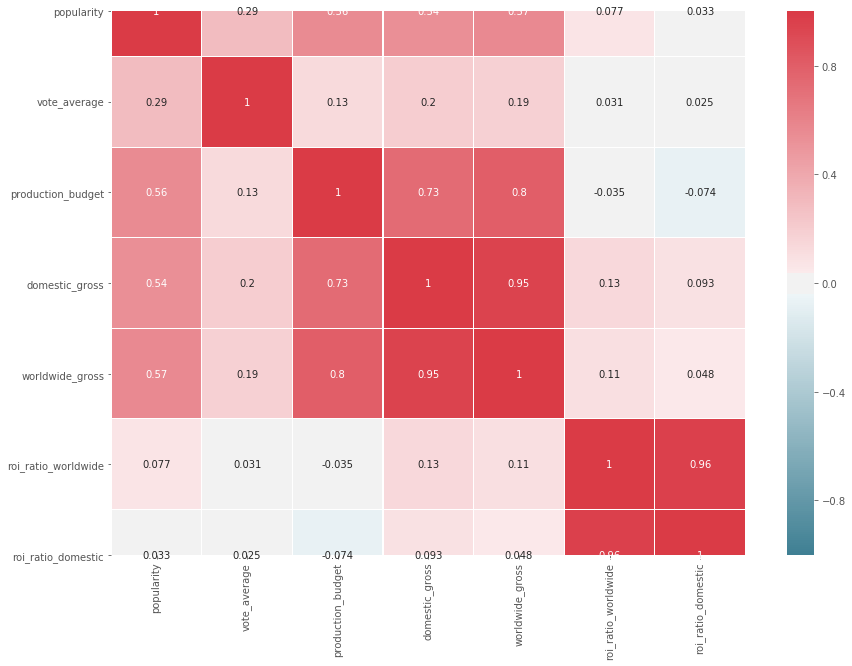

In [44]:
# Showing the result on a heatmap

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline



f, ax = plt.subplots(figsize=(15, 10))
corr = df_corr.corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax.set_ylim([0,2])
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.2, ax=ax, annot=True,)

plt.show()

As the values above 0.5 and below -0.5 can be referred as significant correlation, from the result of `corr()` function it can be said that there is strong correlation between:

 - popularity and production budget, domestic gross and worldwide gross, 
 - production budget and domestic gross, worldwide gross, 
 - domestic gross and production gross, worldwide gross, 
 - ROI worldwide and ROI domestic

It can be concluded that there is positive relationship between these variables. As the values of one variable increase as the values of another increase. Production budget, domestic gross, worldwide gross as well as popularity are positively correlated. It is interesting to see that there is not a significant correlation between popularity and vote_average.


In [45]:
# Excluding the data whose value is 0 to see if anything changes
df_corr_2 = df_corr[
    (df_corr['worldwide_gross'] > 0)
]
df_corr_2.corr()

,popularity,vote_average,production_budget,domestic_gross,worldwide_gross,roi_ratio_worldwide,roi_ratio_domestic
popularity,1.000000,0.254672,0.537942,0.520589,0.552816,0.053897,0.010398
vote_average,0.254672,1.000000,0.087221,0.171949,0.164144,0.007850,0.003072
production_budget,0.537942,0.087221,1.000000,0.723865,0.794082,-0.057107,-0.094899
domestic_gross,0.520589,0.171949,0.723865,1.000000,0.946332,0.116864,0.077897
worldwide_gross,0.552816,0.164144,0.794082,0.946332,1.000000,0.093312,0.033142
roi_ratio_worldwide,0.053897,0.007850,-0.057107,0.116864,0.093312,1.000000,0.962981
roi_ratio_domestic,0.010398,0.003072,-0.094899,0.077897,0.033142,0.962981,1.000000


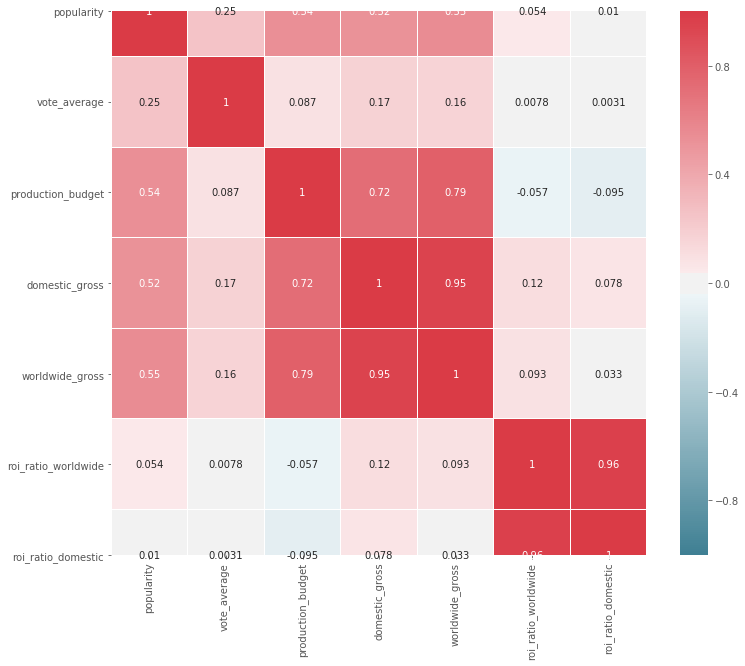

In [46]:
# Showing the results on a heatmap
f, ax = plt.subplots(figsize=(12, 10))
corr = df_corr_2.corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            linewidths=.2, ax=ax, annot=True)

plt.show()

Heatmap is used to show correlation function results in a visual representation. When the '0' values are excluded from the worldwide gross thus from the domestic gross, no apparent changes can be observed. With a large dataset more meaningful insights can be gained as the dataframe worked on has limited number of movies. 

## Question 3: Is there any relation between ROI and genre? Which genre returns more ROI? What are the top genres in return?

For most of the investors and new companies at the cinema sector, it would be helpful to search which genre is more profitable when choosing projects to invest. Also, the top genres will be explored to see if the genres returning more profit and popular genres are consistent with each other.

To start with 'imdb_title_basics_gz' is chosen to work on since it contains high number of movies and the genres together. Then, the df_genres is combined with df_gross to unify all the necessary values in one dataframe.

In [47]:
# Defined the dataframe that I wanted to work on as df and dropped the unnecessray column. 
df_genres = e['imdb_title_basics_gz']
df_genres.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### Cleaning the data

In [48]:
# Checking the datatypes of all the columns and missing values
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


After checking the genres, it is noticed that runtime_minutes and genres has the most missing values. since the runtime_minutes is not important in our analysis, just the missing values of genres is taken into account for cleaning. 

In [49]:
# Searching the null values
df_genres['genres'].isna().sum()

5408

In [50]:
# Removing the null values from genres
df_genres = df_genres[df_genres.genres != 'nan'].copy(deep=True)

In [51]:
# Checking the duplicated values
duplicates = df_genres[df_genres.duplicated(subset=['tconst'])]
len(duplicates)

0

The type genres column is changed from object to string which will be helpful in our analysis at the later steps.

In [52]:
# Changing the type of 'genre' column from object to string
df_genres['genres'] = df_genres['genres'].astype(str)

In [53]:
df_genres.head(50)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


### Merging the dataframes

In [54]:
# Merging df_gross dataframe with df_genres
df_genres.rename(columns={'primary_title':'title'}, inplace=True)
df_genres.set_index('title', drop=True, inplace=True)
merged_genres = df_gross.merge(df_genres, how='inner', left_index=True, right_index=True)

In [56]:
merged_genres.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,roi_ratio_worldwide,roi_ratio_domestic,tconst,original_title,start_year,runtime_minutes,genres
title,,,,,,,,,,,,,,
#Horror,16,2015-11-20,1500000,0,0,2015,11,-1.000000,-1.000000,tt3526286,#Horror,2015,101.0,"Crime,Drama,Horror"
10 Cloverfield Lane,54,2016-03-11,5000000,72082999,108286422,2016,3,20.657284,13.416600,tt1179933,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,2015-11-11,12000000,14616,14616,2015,11,-0.998782,-0.998782,tt3453052,10 Days in a Madhouse,2015,111.0,Drama
12 Rounds,37,2009-03-27,20000000,12234694,17306648,2009,3,-0.134668,-0.388265,tt3517850,12 Rounds,2017,NaN,"Action,Drama,Romance"
12 Strong,64,2018-01-19,35000000,45819713,71118378,2018,1,1.031954,0.309135,tt1413492,12 Strong,2018,130.0,"Action,Drama,History"


In [55]:
# Creating a unique_genres list with for loop
genres_list = []
for genres in merged_genres['genres']:
    genres_list.extend(genres.split(','))
    
unique_genres = list(set(genres_list))
unique_genres

['Western',
 'Fantasy',
 'Reality-TV',
 'Adventure',
 'Sci-Fi',
 'Horror',
 'Documentary',
 'History',
 'Comedy',
 'Music',
 'Musical',
 'Thriller',
 'Action',
 'Drama',
 'Mystery',
 'nan',
 'Sport',
 'Romance',
 'War',
 'Crime',
 'Biography',
 'Animation',
 'Family',
 'News']

First, in order to count genres separately for each movie, unique_genres list created. Then with for loop each genre counted on the genres column with str.contains() function while the mean of ROI worlwide ratio calculated for each movie. 

### Showing the results for first part of the question on the bar plot 

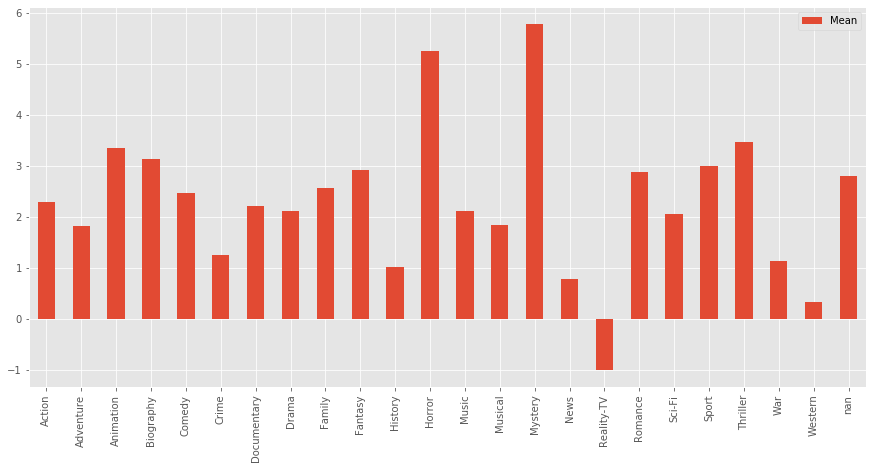

In [57]:
# Creating a bar plot showing Worldwide ROI Ratio by genres.
unique_genres = sorted(unique_genres)
results = []
for genre in unique_genres:
    result = merged_genres[merged_genres['genres'].str.contains(genre)]['roi_ratio_worldwide'].mean()
    results.append(result)

output = pd.DataFrame({'Mean': results}, index=unique_genres)


fig, ax = plt.subplots(figsize=(15,7))
output.plot.bar(ax=ax)
plt.show()

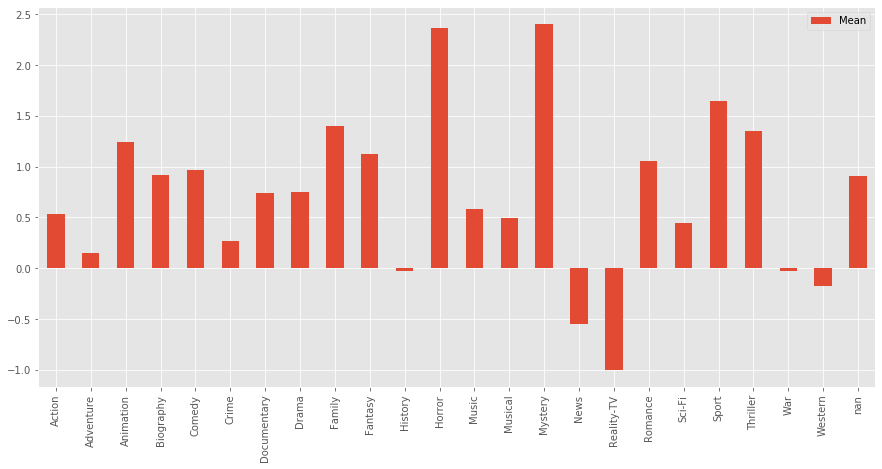

In [58]:
# Creating a bar plot showing Domestic ROI Ratio by genres.
unique_genres = sorted(unique_genres)
results = []
for genre in unique_genres:
    result = merged_genres[merged_genres['genres'].str.contains(genre)]['roi_ratio_domestic'].mean()
    results.append(result)

output = pd.DataFrame({'Mean': results}, index=unique_genres)


fig, ax = plt.subplots(figsize=(15,7))
output.plot.bar(ax=ax)
plt.show()

It is apparent that mystery has the highest Worldwide ROI ratio with horror and thriller following. While on average reality-tv genre returns loss. 

For Domestic ROI ratio mystery and horror has the highest numbers followed by sport genre. While reality-TV, news, western and war returns loss.  

### Showing the results for the second part of the question on the bar plot and wordcloud

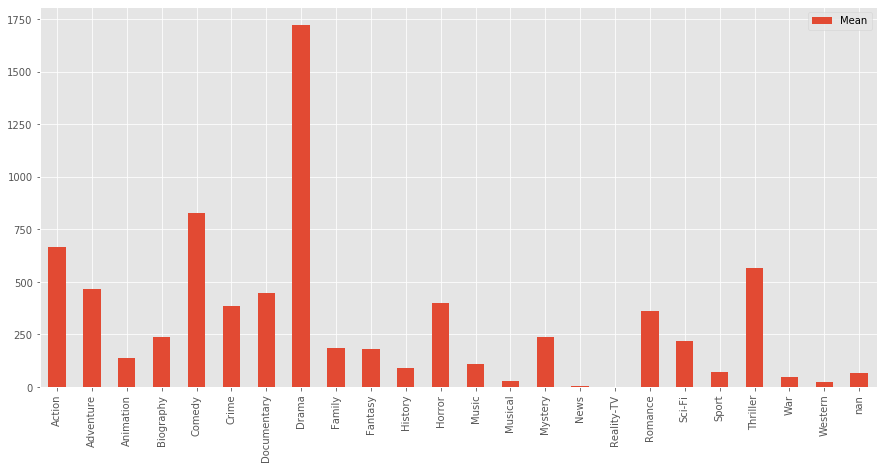

In [59]:
# Creating a bar plot showing top genres
unique_genres = sorted(unique_genres)
results = []
for genre in unique_genres:
    result = merged_genres[merged_genres['genres'].str.contains(genre)]['id'].count()
    results.append(result)

output = pd.DataFrame({'Mean': results}, index=unique_genres)


fig, ax = plt.subplots(figsize=(15,7))
output.plot.bar(ax=ax)
plt.show()

Contrary to above results, top genres produced are drama, comedy, action and thriller while the mystery and thriller not at the top of the list. With a wordcloud visual it can be clearly seen which movies are popular in terms of production. 

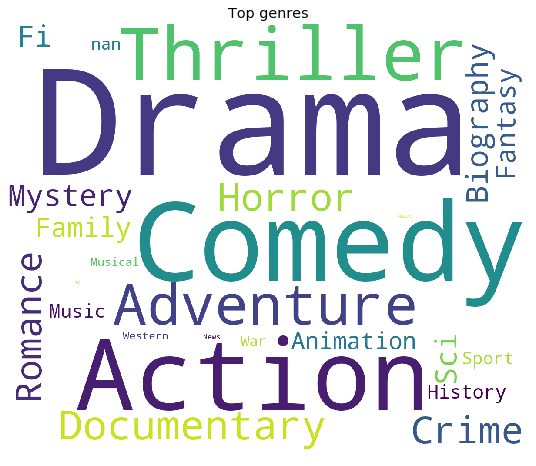

In [60]:
# Creating a wordcloud showing popular genres

from wordcloud import WordCloud, STOPWORDS 


plt.figure(figsize = (12, 8))
text = ' '.join(genres_list)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

## Conclusion

Throughout this project the datasets are explored to reach answers to the questions which may help to decision making process and provide valuable insights to new companies/investors in the movie industry. 

From the answers it may be concluded that:

- 2013, 2014 and 2015 has the highest number of movies between 2009 and 2019,
- top 3 months movies released are October, April and March,
- June, July and August are the months with highest average ROI,
- top 4 months with highest average production budget are May, June, July and November,
- there is significant correlation between:
    - popularity and production budget, domestic gross and worldwide gross,
    - production budget and domestic gross, worldwide gross,
    - domestic gross and production gross, worldwide gross,
    - ROI worldwide and ROI domestic
- top 3 genres in terms of Worldwide ROI ratio are mystery, horror and thriller while on average reality-tv genre returns loss,
- top 3 genres in terms of Domestic ROI ratio are mystery, horror and sport while reality-TV, news, western and war returns loss,
- top genres produced are drama, comedy, action and thriller.
